In [3]:
import cplex
from asignacion_cuadrillas import armar_lp, resolver_lp, mostrar_solucion, cargar_instancia_con_configuracion
from cplex._internal._constants import CPX_VARSEL_DEFAULT, CPX_VARSEL_STRONG, CPX_ON, CPX_OFF
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def configurar_y_resolver(path, **config):
    instancia = cargar_instancia_con_configuracion(path, **config)
    prob = cplex.Cplex()
    armar_lp(prob, instancia, shouldWrite=False)
    resolver_lp(prob, instancia)
    mostrar_solucion(prob, instancia)

activar_restriccion_opcional_1 = False, 
activar_restriccion_opcional_2 = False,
tolerancia = 1e-6,
seleccion_nodo = None,
seleccion_variable = None,
heuristica_primal = None,
preproceso = None

Resolvemos El problema con las restricciones deseables

In [5]:
configurar_y_resolver("./entradas/entrada_pequena.txt", activar_restriccion_opcional_1 = True, activar_restriccion_opcional_2 = True, preproceso = CPX_OFF)
configurar_y_resolver("./entradas/entrada_pequena.txt", preproceso = CPX_OFF)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (0.14 ticks)
Clique table members: 1497.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.12 sec. (73.42 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  7743000.0000              --- 
      0     0   200222.2222    98        0.0000   200222.2222      883     --- 
*     0+    0                       109000.0000   200222.2222            83.69%
      0     0        cutoff         109000.0000                   1179     --- 
Elapsed time = 0.94 sec. (

Resolvemos el problema sin las restricciones generales

In [4]:
configurar_y_resolver("./entradas/entrada_pequena.txt", preproceso = CPX_OFF)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (0.14 ticks)
Clique table members: 1411.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.11 sec. (83.55 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  7743000.0000              --- 
      0     0   210000.0000   150        0.0000   210000.0000      905     --- 
*     0+    0                       210000.0000   210000.0000             0.00%
      0     0        cutoff         210000.0000   210000.0000      914    0.00%
Elapsed time = 0.89 sec. (

In [8]:
#La misma función que antes pero esta retorna los tiempos ejecución
def configurar_y_resolver_devuelve_tiempos(path, **config):
    instancia = cargar_instancia_con_configuracion(path, **config)
    prob = cplex.Cplex()
    armar_lp(prob, instancia, shouldWrite=False)
    resolver_lp(prob, instancia)
    return instancia.tiempo_de_computo

def promediar_n_tiempos(n,path,**config):
    tiempos =[]
    cont = 0
    while cont != n:
        t = configurar_y_resolver_devuelve_tiempos(path, **config)
        tiempos.append(t)
        cont = cont + 1
    tiempo_medio = np.mean(tiempos)
    return tiempo_medio

In [9]:
#calculamos los tiempos para los distintos niveles de preprocesamiento.
valores = [0,0.5,1,1.5,2]
tiempos_valores_heuristica = []
for i in valores:
    tiempo_i = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF, heuristica_primal = i)
    tiempos_valores_heuristica.append(tiempo_i)

print(valores,tiempos_valores_heuristica)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
CPXPARAM_MIP_Strategy_HeuristicEffort            0
Clique table members: 21814.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 15.27 sec. (3545.85 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0   182000.0000    92                 182000.0000     2161         
Detecting symmetries...
*     0     0      integral     0   182000.0000   182000.0000     2161    0.00%
      0     0   182000.0000     0   182000.0000   182000.0000     2161    0.00%
Elapsed time = 55.66 sec. (27047.31 ticks, tree = 0.02 MB, solutions = 0)

Root node proce

Text(0, 0.5, 'Tiempo medio de ejecucion (seg)')

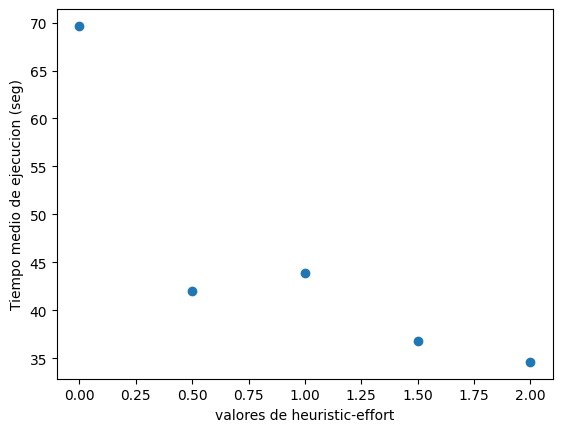

In [16]:
plt.scatter(valores,tiempos_valores_heuristica)
plt.xlabel('valores de heuristic-effort')
plt.ylabel('Tiempo medio de ejecucion (seg)')


In [11]:
#Tiempos usando preprocesamiento (default de cplex)
tiempo_medio_preprocesamiento=promediar_n_tiempos(5,"./entradas/entrada_mediana.txt")
print(tiempo_medio_preprocesamiento)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.02 sec. (9.54 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 330 rows and 122 columns.
Reduced MIP has 1609794 rows, 13050 columns, and 7129908 nonzeros.
Reduced MIP has 12930 binaries, 120 generals, 0 SOSs, and 0 indicators.
Presolve time = 5.05 sec. (5639.33 ticks)
Probing time = 0.77 sec. (150.47 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 1609794 rows, 13050 columns, and 7129908 nonzeros.
Reduced MIP has 12930 binaries, 120 generals, 0 SOSs, and 0 indicators.
Presolve time = 28.28 sec. (11388.68 ticks)
Probing time = 0.78 sec. (141.43 ticks)
Clique table members: 32452.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution 

In [14]:
tiempo_medio_default_sin_pre = promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF)


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.05 sec. (22.24 ticks)
Clique table members: 65570.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 14.86 sec. (1457.13 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  2571000.0000              --- 
      0     0        cutoff              0.0000        0.0000        0    0.00%
      0     0        cutoff              0.0000        0.0000        0    0.00%
Elapsed time = 36.30 sec. (5712.24 ticks, tree = 0.01 MB, solutions = 1)

Root node processing (befor

In [13]:
tiempo_medio_default_con_pre = promediar_n_tiempos(1,"./entradas/entrada_grande.txt")


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.02 sec. (22.24 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 100 rows and 510 columns.
Reduced MIP has 3741320 rows, 32850 columns, and 21052040 nonzeros.
Reduced MIP has 32450 binaries, 400 generals, 0 SOSs, and 0 indicators.
Presolve time = 18.16 sec. (9753.39 ticks)
Probing time = 3.36 sec. (397.46 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Elapsed time for symmetry detection = 44.62 sec. (10000.99 ticks)
Elapsed time for symmetry detection = 91.38 sec. (20050.81 ticks)
Found 6.688094e+166 symmetric permutations.
Reduced MIP has 3741320 rows, 32850 columns, and 21052040 nonzeros.
Reduced MIP has 32450 binaries, 400 generals, 0 SOSs, and 0 indicators.
Presolve time = 133.41 sec. (37286.32 ticks)
Probing time = 6.73 sec. (362.37 ticks)
Clique tabl

In [12]:
#Tiempo medio usando strongBranching
tiempo_medio_strong_b=promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF, seleccion_variable = CPX_VARSEL_STRONG)
#Tiempo medio usando pseudocosto
tiempo_medio_pseudocosto = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt",preproceso = CPX_OFF, seleccion_variable = 2)
#Tiempo medio usando el criterio default de cplex
tiempo_medio_default = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF, seleccion_variable = CPX_VARSEL_DEFAULT)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Strategy_VariableSelect             3
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (9.54 ticks)
Clique table members: 21814.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 10.80 sec. (3545.85 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000   1.22850e+07              --- 
      0     0   182000.0000    92        0.0000   182000.0000     2161     --- 
*     0+    0                       182000.0000   182000.0000             0.00%
      0     0        cutoff         182000.0000   1

In [13]:

print('Tiempo medio con criterio de strongBranching: ',tiempo_medio_strong_b)
print('tiempo medio con criterio de pseudocosto: ',tiempo_medio_pseudocosto)
print('Tiempo medio con criterio default de cplex: ',tiempo_medio_default)

Tiempo medio con criterio de strongBranching:  29.446400000015274
tiempo medio con criterio de pseudocosto:  29.131199999991804
Tiempo medio con criterio default de cplex:  29.115599999984262


In [15]:
#Medicion de tiempos de criterio de leccion de nodo con entrada grande
#Tiempo medio usando strongBranching
tiempo_medio_strong_b=promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF, seleccion_variable = CPX_VARSEL_STRONG)
#Tiempo medio usando pseudocosto
tiempo_medio_pseudocosto = promediar_n_tiempos(1,"./entradas/entrada_grande.txt",preproceso = CPX_OFF, seleccion_variable = 2)
#Tiempo medio usando el criterio default de cplex
tiempo_medio_default = promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF, seleccion_variable = CPX_VARSEL_DEFAULT)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Strategy_VariableSelect             3
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.03 sec. (22.24 ticks)
Clique table members: 65570.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 17.34 sec. (1457.13 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  2571000.0000              --- 
      0     0        cutoff              0.0000        0.0000        0    0.00%
      0     0        cutoff              0.0000        0.0000        0    0.00%
Elapsed time = 38.45 sec. (5712.24 ticks, tree = 0

In [16]:
print('Tiempo medio con criterio de strongBranching: ',tiempo_medio_strong_b)
print('tiempo medio con criterio de pseudocosto: ',tiempo_medio_pseudocosto)
print('Tiempo medio con criterio default de cplex: ',tiempo_medio_default)

Tiempo medio con criterio de strongBranching:  38.68799999996554
tiempo medio con criterio de pseudocosto:  38.375
Tiempo medio con criterio default de cplex:  34.18700000003446


In [20]:
#Calculo tiempos para los distintos criterios de seleccion de nodo
tiempo_medio_deep = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF, seleccion_nodo = 0)
tiempo_medio_bestestimate = promediar_n_tiempos(5,"./entradas/entrada_mediana.txt", preproceso = CPX_OFF, seleccion_nodo = 2)


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.02 sec. (9.54 ticks)
Clique table members: 21814.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 11.31 sec. (3545.85 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000   1.22850e+07              --- 
      0     0   182000.0000    92        0.0000   182000.0000     2161     --- 
*     0+    0                       182000.0000   182000.0000             0.00%
      0     0        cutoff         182000.0000   182000.0000     2161    0.00%
Elapsed time = 30.42 s

In [21]:
print('Tiempo medio usando criterio de profundidad: ', tiempo_medio_deep)
print('tiempo medio usando bestStimate: ', tiempo_medio_bestestimate)


Tiempo medio usando criterio de profundidad:  29.712799999990967
tiempo medio usando bestStimate:  30.102800000004937


In [17]:
#Vemos con entrada grande
tiempo_medio_normal = promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF)
tiempo_medio_deep = promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF, seleccion_nodo = 0)
tiempo_medio_bestestimate = promediar_n_tiempos(1,"./entradas/entrada_grande.txt", preproceso = CPX_OFF, seleccion_nodo = 2)

print(tiempo_medio_deep)
print(tiempo_medio_normal)
print(tiempo_medio_bestestimate)


Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.03 sec. (22.24 ticks)
Clique table members: 65570.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 14.03 sec. (1457.13 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  2571000.0000              --- 
      0     0        cutoff              0.0000        0.0000        0    0.00%
      0     0        cutoff              0.0000        0.0000        0    0.00%
Elapsed time = 34.42 sec. (5712.24 ticks, tree = 0.01 MB, solutions = 1)

Root node processing (befor

In [1]:
import cplex
from asignacion_cuadrillas import armar_lp, resolver_lp, mostrar_solucion, cargar_instancia_con_configuracion
from cplex._internal._constants import CPX_VARSEL_DEFAULT, CPX_VARSEL_STRONG, CPX_ON, CPX_OFF
import numpy as np
import os
import psutil
import matplotlib.pyplot as plt

In [2]:
def configurar_y_resolver_devuelve_optimo(path, **config):
    instancia = cargar_instancia_con_configuracion(path, **config)
    prob = cplex.Cplex()
    armar_lp(prob, instancia, shouldWrite=False)
    resolver_lp(prob, instancia)
    mostrar_solucion(prob, instancia)
    return instancia.funcion_objetivo

#configurar_y_resolver_devuelve_optimo("./entradas/entrada_pequena.txt", preproceso = CPX_OFF, penalizacion_conflicto = 11000)


In [5]:

grilla = np.arange(0,140000,10000)
y = []
for i in grilla:
    y.append(configurar_y_resolver_devuelve_optimo("./entradas/entrada_pequena.txt", preproceso = CPX_OFF, penalizacion_conflicto = i))

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (0.14 ticks)
Clique table members: 1411.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.12 sec. (83.55 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  7743000.0000              --- 
      0     0   210000.0000   150        0.0000   210000.0000      905     --- 
*     0+    0                       210000.0000   210000.0000             0.00%
      0     0        cutoff         210000.0000   210000.0000      914    0.00%
Elapsed time = 0.88 sec. (

Text(0, 0.5, 'Valor de la función objetivo')

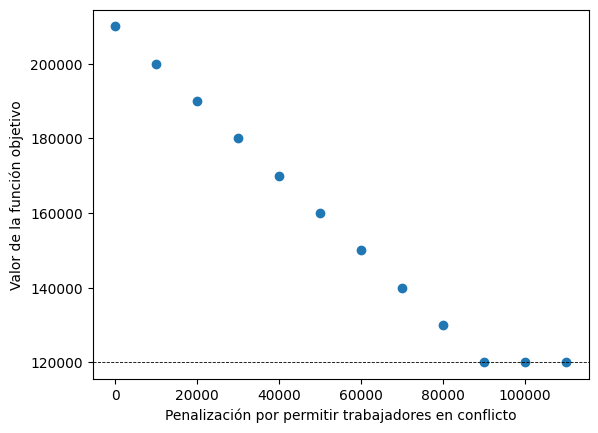

In [14]:
plt.scatter(grilla,y)
plt.axhline(120000, c= 'black',ls = '--',lw=0.6,label = 'Limite de tolerancia conflictos')
plt.xlabel('Penalización por permitir trabajadores en conflicto')
plt.ylabel('Valor de la función objetivo')

In [17]:
configurar_y_resolver("./entradas/entrada_pequena.txt", activar_restriccion_opcional_1 = True, preproceso = CPX_OFF)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Preprocessing_Presolve                  0
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Tolerances_MIPGap                   9.9999999999999995e-07
Found incumbent of value 0.000000 after 0.00 sec. (0.14 ticks)
Clique table members: 1477.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.11 sec. (82.49 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                            0.0000  7743000.0000              --- 
      0     0   210000.0000   124        0.0000   210000.0000     1193     --- 
*     0+    0                       115000.0000   210000.0000            82.61%
      0     0   120000.0000    25   115000.0000       Cuts: 9     1666    4.35%
*     0+    0             